In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import time 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import classification_report ,confusion_matrix

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
Cat_Features = df[["workclass","education","educational-num","marital-status","occupation","relationship"\
                ,"race","gender","native-country","income"]]
Num_Features = df.drop(Cat_Features,axis=1)

# Categorical Describtion 

In [6]:
unique_counts = Cat_Features.nunique()
unique_values = Cat_Features.apply(lambda x : np.unique(x))
pd.DataFrame({"Unique Counts" : unique_counts,"Unique Values :":unique_values})

,Unique Counts,Unique Values :
workclass,9,"[?, Federal-gov, Local-gov, Never-worked, Priv..."
education,16,"[10th, 11th, 12th, 1st-4th, 5th-6th, 7th-8th, ..."
educational-num,16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
marital-status,7,"[Divorced, Married-AF-spouse, Married-civ-spou..."
occupation,15,"[?, Adm-clerical, Armed-Forces, Craft-repair, ..."
relationship,6,"[Husband, Not-in-family, Other-relative, Own-c..."
race,5,"[Amer-Indian-Eskimo, Asian-Pac-Islander, Black..."
gender,2,"[Female, Male]"
native-country,42,"[?, Cambodia, Canada, China, Columbia, Cuba, D..."
income,2,"[<=50K, >50K]"


In [7]:
Cat_Features.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# Numerical Describtion

In [8]:
Num_Features.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [9]:
noisy_workclass = df[df["workclass"]=="?"].index
noisy_occupation = df[df["occupation"]=="?"].index
noisy_native_country = df[df["native-country"]=="?"].index
print(" Numbers of Noisy Workclass : ",len(noisy_workclass))
print(" Numbers of Noisy occupation : ",len(noisy_occupation))
print(" Numbers of Noisy Workclass : ",len(noisy_native_country))

 Numbers of Noisy Workclass :  2799
 Numbers of Noisy occupation :  2809
 Numbers of Noisy Workclass :  857


# Univariate Analysis

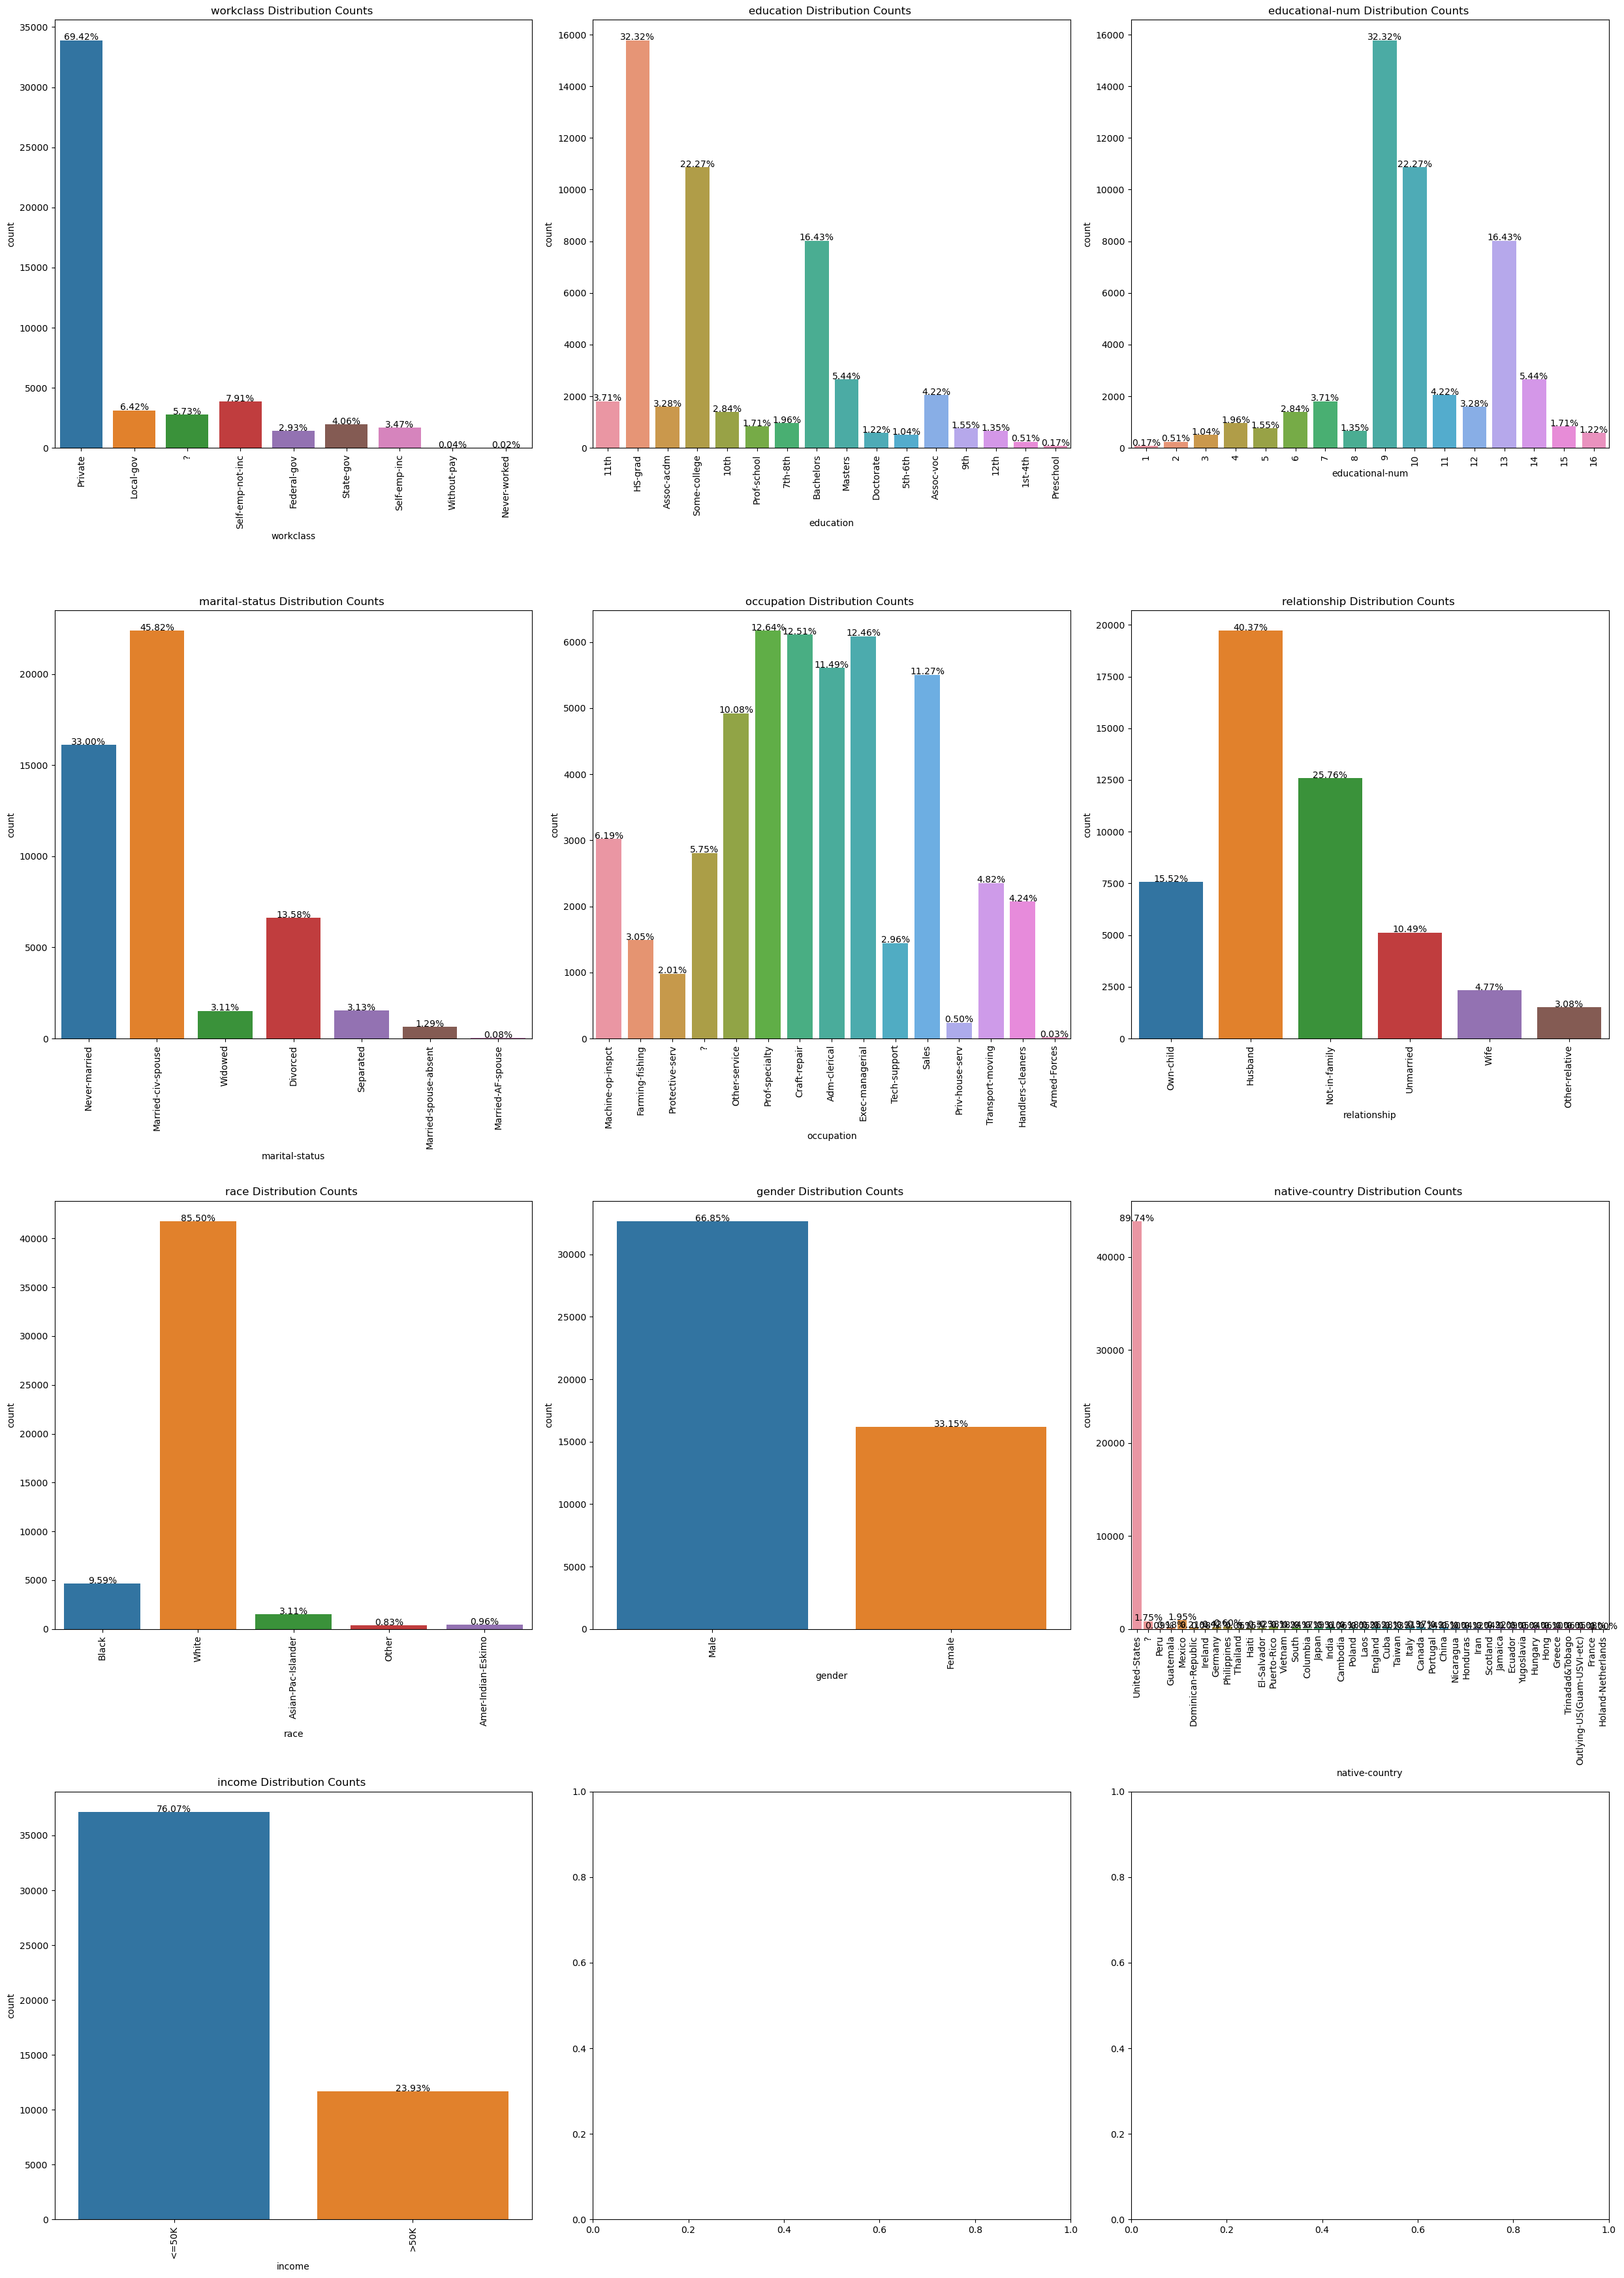

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 35))
axes = axes.flatten()
for i, col in enumerate(Cat_Features):
    ax = sns.countplot(x=df[col], ax=axes[i])
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., h + 5, "{:1.2f}%".format(h / float(df.shape[0]) * 100), ha="center")
    ax.set_title(f"{col } Distribution Counts ")
    ax.tick_params(axis = "x", labelrotation=90)
plt.tight_layout()
plt.show()

In [11]:
def box_hist_viol(col) :
    f,ax = plt.subplots(1,3,figsize=(10,3))
    sns.boxplot(x=col , ax=ax[0])
    sns.violinplot(x=col , ax=ax[1])
    sns.histplot(x=col ,ax=ax[2])

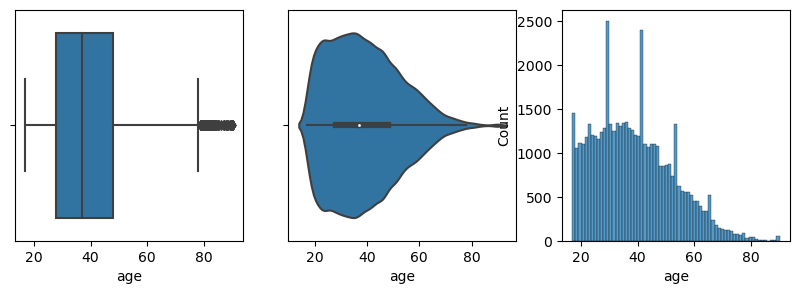

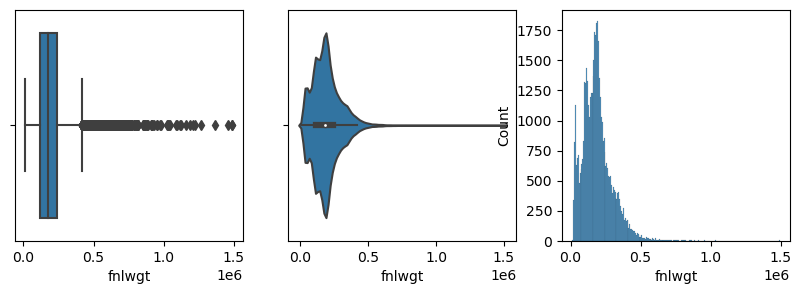

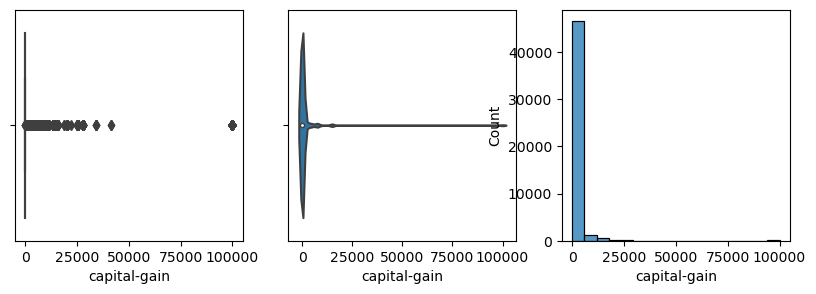

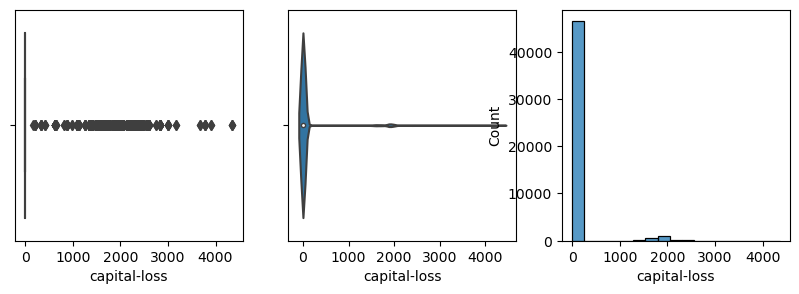

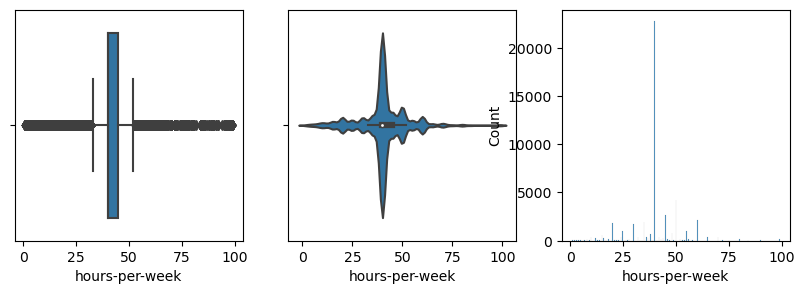

In [12]:
for col in Num_Features :
    box_hist_viol(df[col])

# Data_Cleaning 

In [13]:
df.replace({"?":np.nan},inplace=True)

In [14]:
df["workclass"].fillna(df["workclass"].mode()[0],inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0],inplace=True)
df["native-country"].fillna(df["native-country"].mode()[0],inplace=True)

In [15]:
countries = {}
for row in df["native-country"] :
    if row in countries :
        countries[row] = countries[row] + 1
        
    else :
        countries[row] = 1
country_counts_df = pd.DataFrame.from_dict(countries, orient='index', columns=['Count'])
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)
country_counts_df

,Count
United-States,44689
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138
England,127


In [16]:
df["native-country"] = df["native-country"].apply(lambda x: "Other" if x != "United-States" else x)

In [17]:
df = df[df["hours-per-week"]<60] 

In [18]:
np.unique(df["education"])

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [19]:
np.unique(df["educational-num"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [20]:
np.unique(df[df["educational-num"]==16]["education"])

array(['Doctorate'], dtype=object)

In [21]:
df.drop("education",axis=1,inplace=True)


In [22]:
Cat_Features.drop("education",axis=1,inplace=True)

In [23]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


# Bivariate Analysis

In [24]:
df["income"].replace({"<=50K":0,">50K":1},inplace=True)

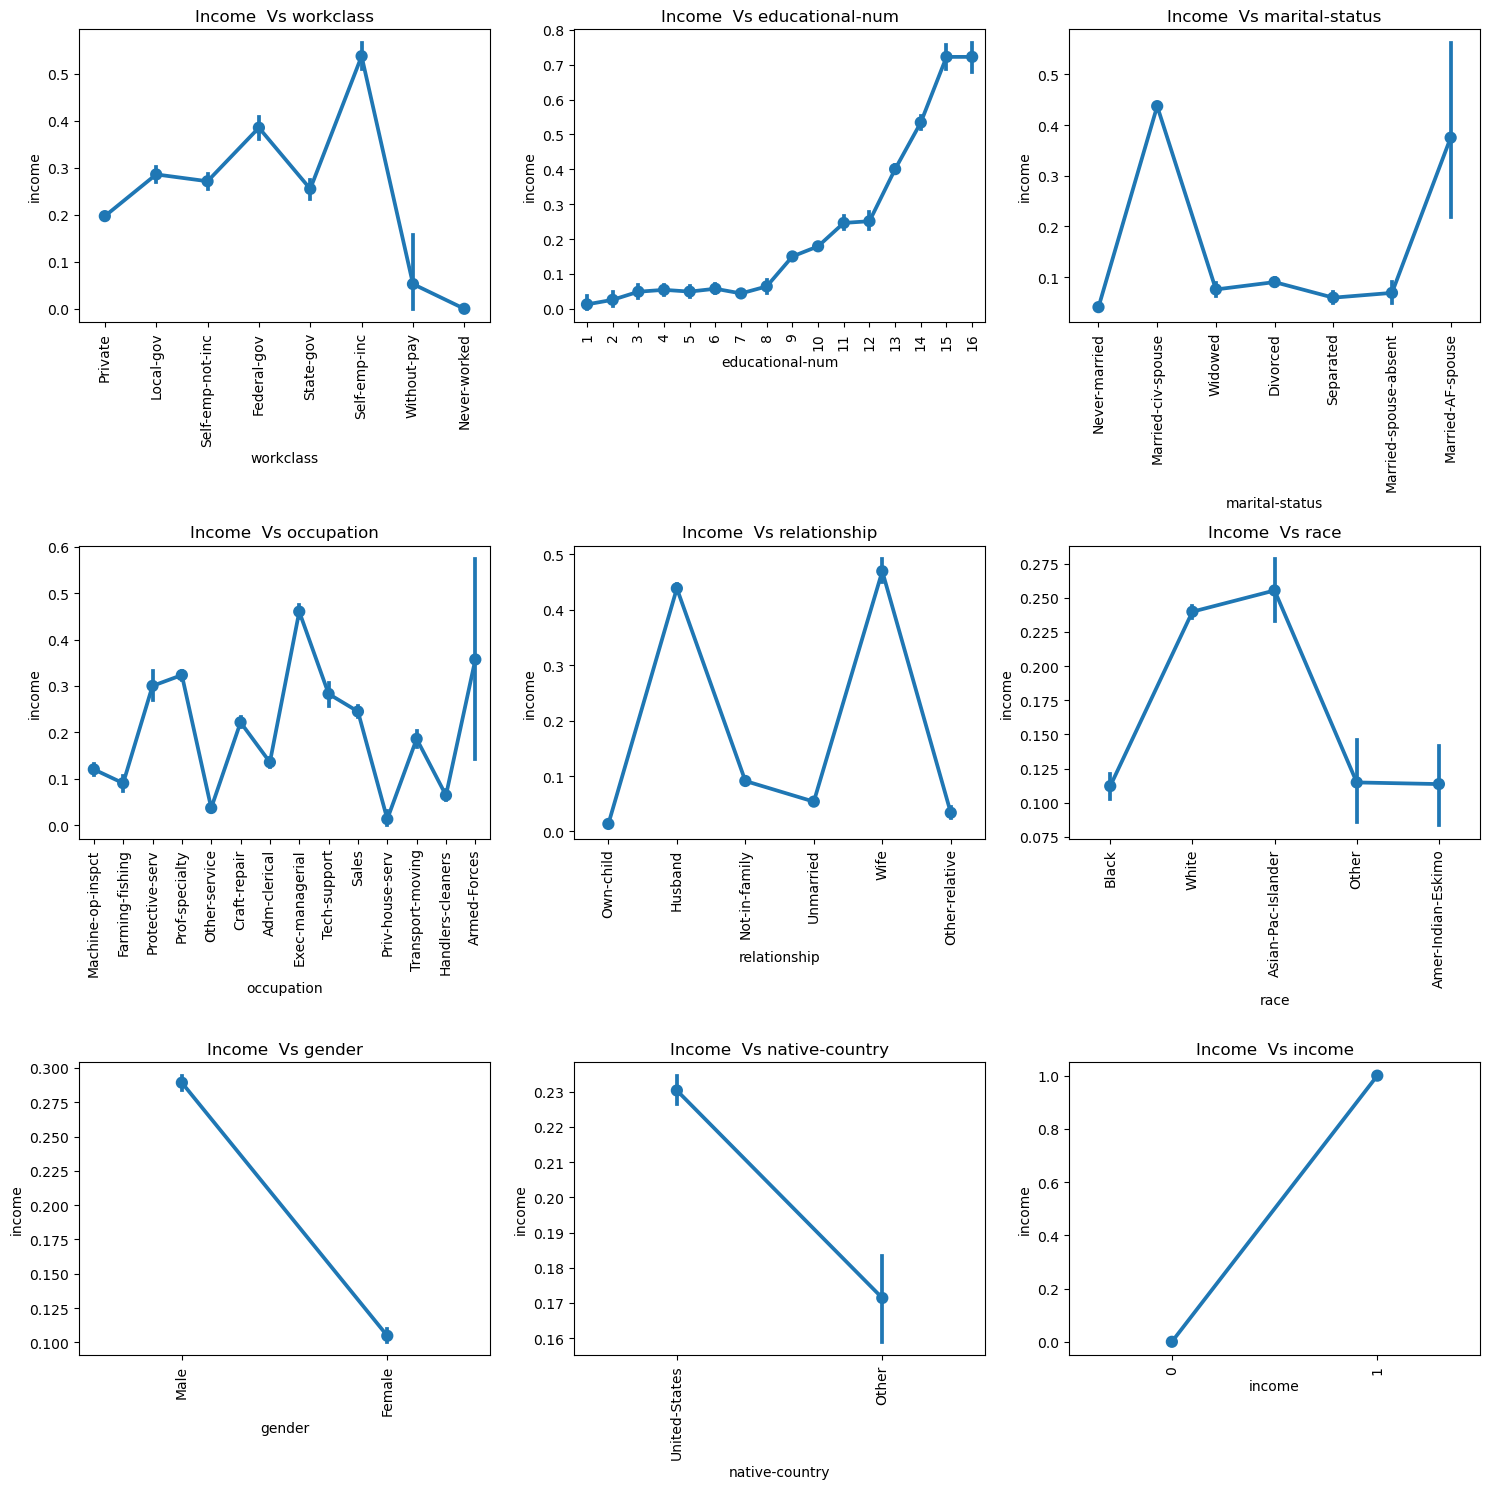

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(Cat_Features):
    ax = sns.pointplot(x=df[col],y=df["income"], ax=axes[i])
    ax.set_title(f"Income  Vs {col}")
    ax.tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

In [26]:
def chi_squared_test(col) :
    c_t =pd.crosstab(df[col],df["income"])
    stats , pval , dof , expected_val = chi2_contingency(c_t)
    print(c_t)
    print("Stats : ",stats)
    print("Pval : ",pval)
    print("DOF : ",dof)
    print("Expected Values : ",expected_val)
    if pval < 0.05 :
        print(f"We have sufficient evidence to conclude that there is relation between {col} and Income .")
    else :
        print(f"We have ((Insufficient)) evidence to conclude that there is relation between {col} and Income .")
    print(60*"--")

In [27]:
for col in Cat_Features :
    chi_squared_test(col)

income                0     1
workclass                    
Federal-gov         834   522
Local-gov          2103   841
Never-worked         10     0
Private           27691  6792
Self-emp-inc        581   674
Self-emp-not-inc   2226   828
State-gov          1392   476
Without-pay          18     1
Stats :  1169.298756358447
Pval :  3.0727101283332625e-248
DOF :  7
Expected Values :  [[1.05055414e+03 3.05445865e+02]
 [2.28084910e+03 6.63150904e+02]
 [7.74744938e+00 2.25255062e+00]
 [2.67155297e+04 7.76747031e+03]
 [9.72304897e+02 2.82695103e+02]
 [2.36607104e+03 6.87928960e+02]
 [1.44722354e+03 4.20776456e+02]
 [1.47201538e+01 4.27984618e+00]]
We have sufficient evidence to conclude that there is relation between workclass and Income .
------------------------------------------------------------------------------------------------------------------------
income               0     1
educational-num             
1                   78     1
2                  227     6
3                

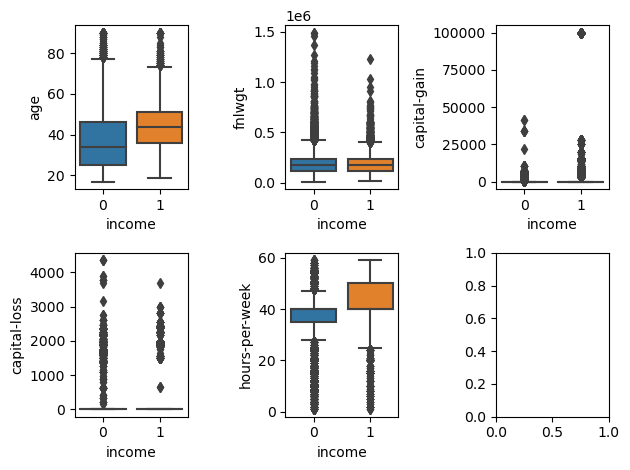

In [28]:
f,axes =plt.subplots(nrows=2 , ncols=3 )
axes = axes.flatten()
for i , col in enumerate(Num_Features) :
    sns.boxplot(x=df["income"],y=df[col],ax=axes[i])
plt.tight_layout()

In [29]:
df.groupby(df["income"]).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,36.721790,190998.012136,9.570219,142.559288,53.180491,36.978913
1,44.388297,188656.571443,11.559108,3614.184527,187.276199,42.388790


In [30]:
income_0 = df[df["income"]==0]
income_1 = df[df["income"]==1]
for col in Num_Features :
    g0 = income_0[col]
    g1 = income_1[col]
    stats , pval  = ttest_ind(g0,g1,equal_var=False)
    print("Stats : ",stats)
    print("Pval : ",pval)
    if pval < 0.05 :
        print(f"We have sufficient evidence to conclude that there is difference between {col} in the two groups.")
    else :
        print(f"We have ((Insufficient)) evidence to conclude that there is difference between {col} in the two groups.")
    print(60*"--")
        

Stats :  -58.7169501301772
Pval :  0.0
We have sufficient evidence to conclude that there is difference between age in the two groups.
------------------------------------------------------------------------------------------------------------------------
Stats :  2.018743386819714
Pval :  0.043529423438811034
We have sufficient evidence to conclude that there is difference between fnlwgt in the two groups.
------------------------------------------------------------------------------------------------------------------------
Stats :  -25.90893847060101
Pval :  2.240056022511559e-143
We have sufficient evidence to conclude that there is difference between capital-gain in the two groups.
------------------------------------------------------------------------------------------------------------------------
Stats :  -22.237347171591104
Pval :  2.3165369088438463e-107
We have sufficient evidence to conclude that there is difference between capital-loss in the two groups.
-----------------

# Multivariate Analysis

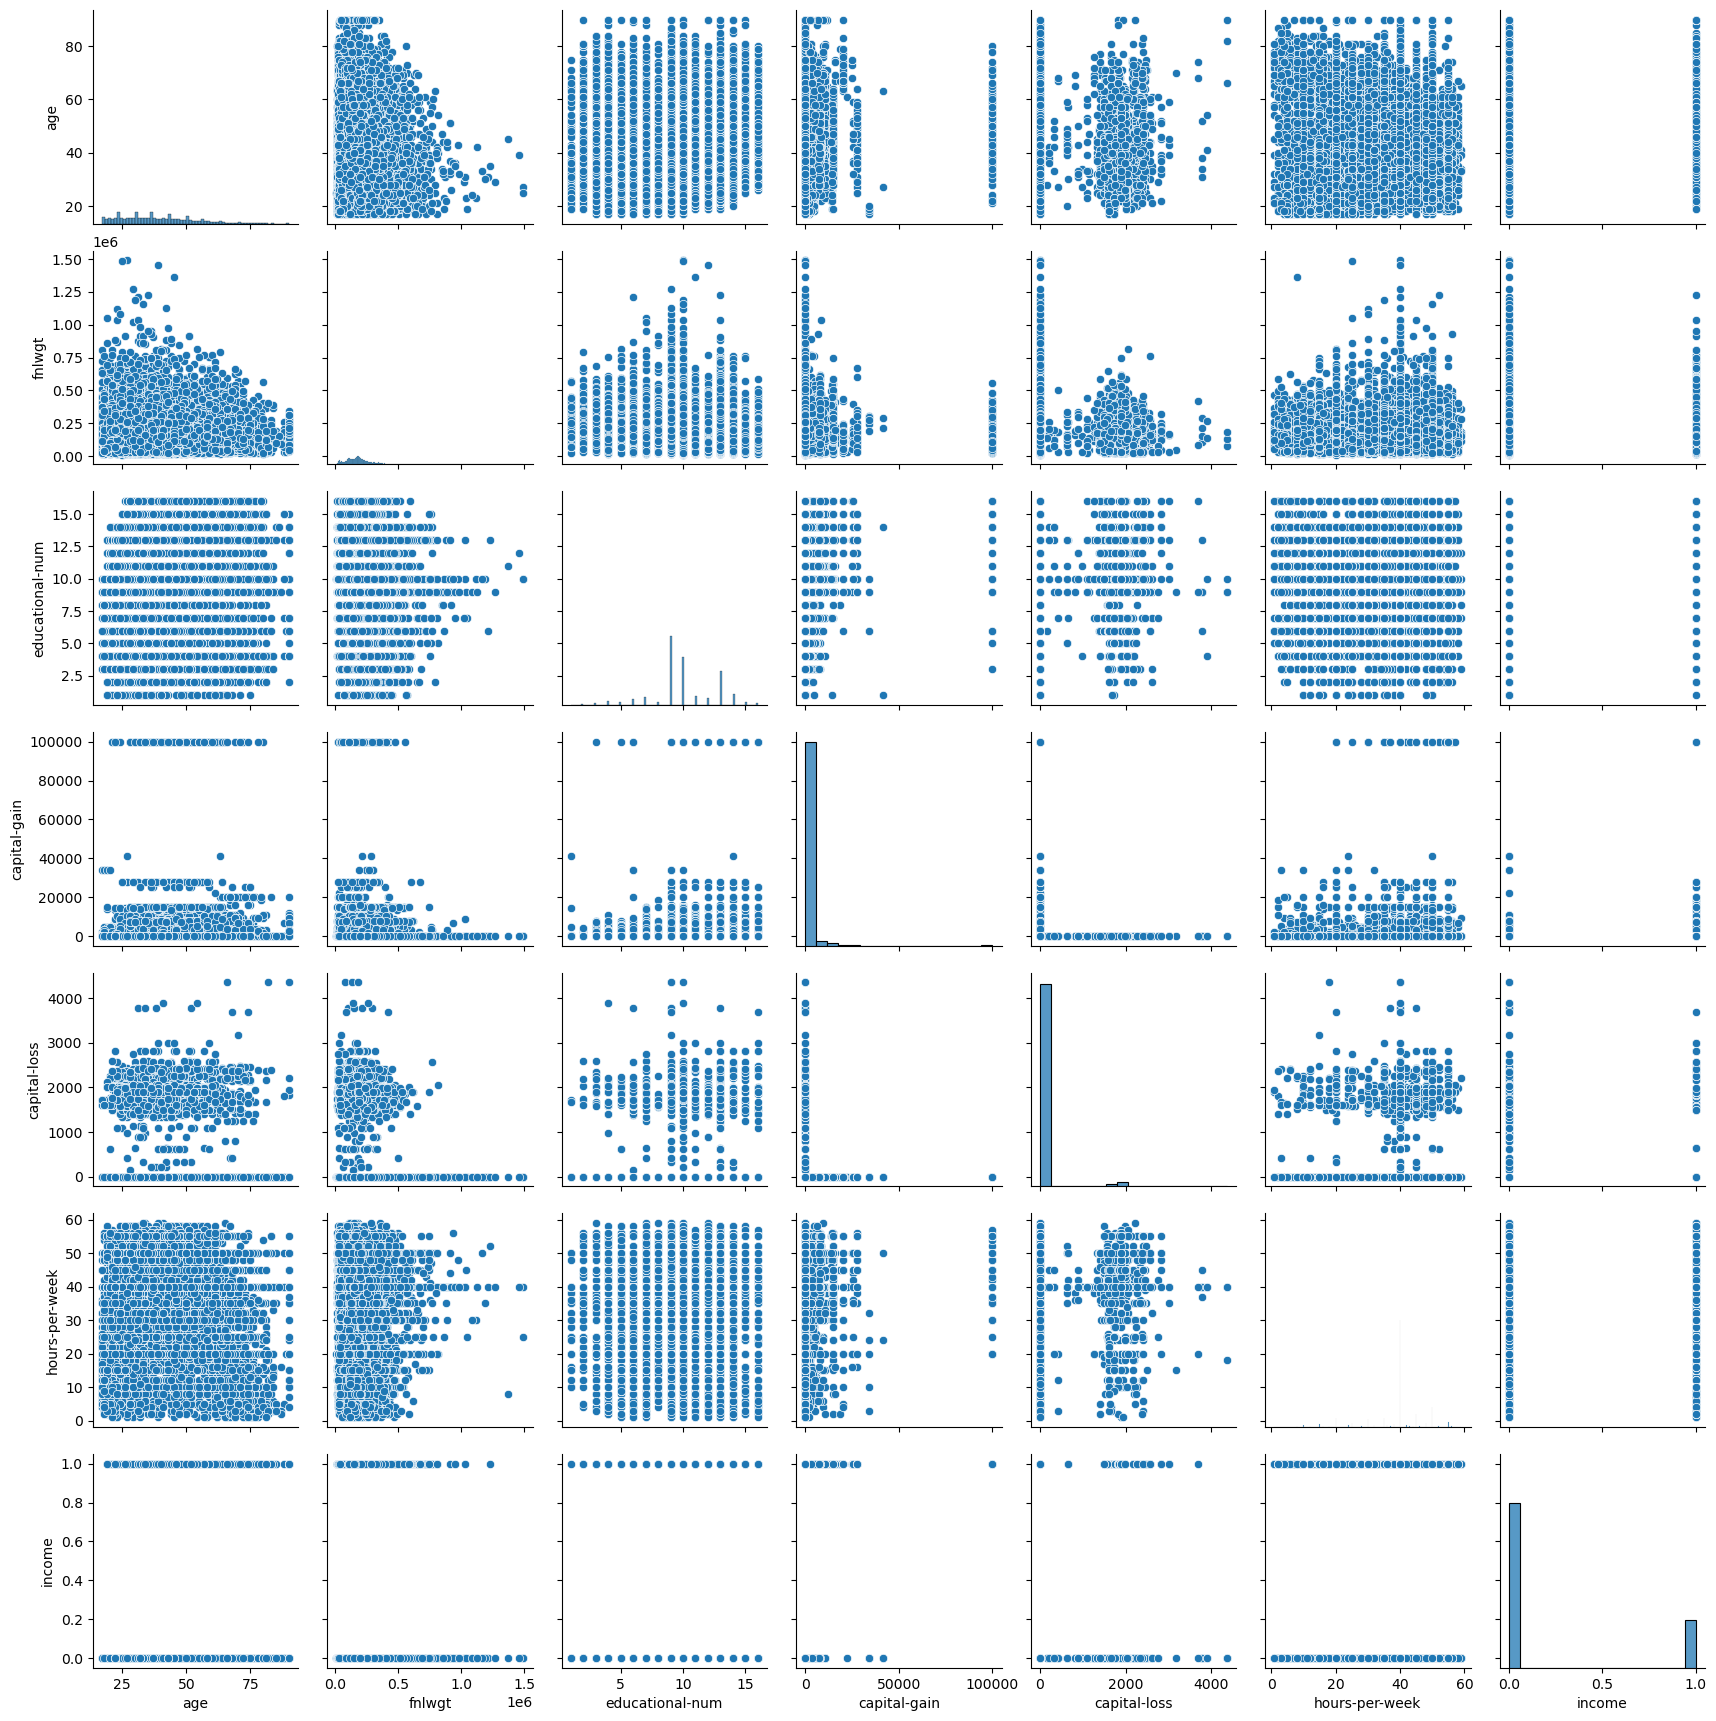

In [31]:
sns.pairplot(df)
plt.show()

# Feature Selection

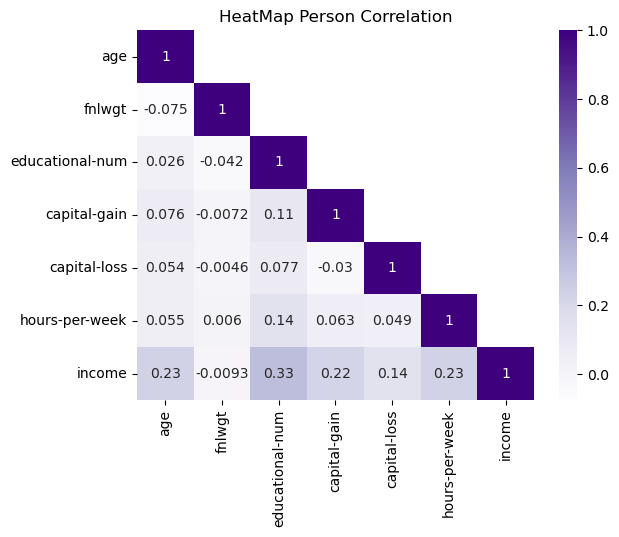

In [32]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask,1)]=True
sns.heatmap(df.corr(),mask=mask,cmap="Purples",annot=True)
plt.title("HeatMap Person Correlation")
plt.show()

In [33]:
def drop_column_importance(model, X_train, y_train, random_state=0):

    importances = []

    model_clone = clone(model)

    model_clone.random_state = random_state

    model_clone.fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()

    

    for col in X_train.columns:

        model_clone = clone(model)

        model_clone.random_state = random_state

        model_clone.fit(X_train.drop(col, axis = 1), y_train)

        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()

        importances.append(benchmark_score - drop_column_score)
        

    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df  

In [52]:
def drop_column_importance_plot(model, X_train, y_train, random_state=0) :
    df = drop_column_importance(model, X_train, y_train)
    sns.barplot(x=df["feature importance"],y=df['feature'],orient = "h" )
    plt.show()

In [35]:
le = LabelEncoder()
for col in Cat_Features.columns :
    if df[col].dtype == "object" :
        df[col] = le.fit_transform(df[col])

In [36]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,1,0
1,38,3,89814,9,2,4,0,4,1,0,0,50,1,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,1,1
3,44,3,160323,10,2,6,0,2,1,7688,0,40,1,1
4,18,3,103497,10,4,9,3,4,0,0,0,30,1,0


In [37]:
def hyperparameter_tunning(clf,params_grid,X_train,Y_train) :
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    best_params = None
    best_score = None
    print("Hyperparameters Tunning Starting .... ")
    for i , params in enumerate(params_grid) :
        start= time.time()
        clf_grid = GridSearchCV(clf,params_grid,cv=cv,scoring="accuracy")
        clf_grid.fit(X_train,Y_train)
        stop = time.time()
        print(f"Iteration {i+1} / {len(params_grid)}")
        print(f"Time Taken{stop - start:.2f} Seconds")
        if best_score is None or clf_grid.best_score_ > best_score :
            best_score = clf_grid.best_score_
            best_params = clf_grid.best_params_
        print(f"Best Score so Far : {best_score:.4f}")
        print(f"Best Params so Far : {best_params}")
    print("End Of Hyperparameters Tunning")
    return best_params


In [38]:
X = df.drop("income",axis=1)
Y = df["income"]
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Decision tree 

In [46]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2']} 
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [94]:
dt = tree.DecisionTreeClassifier()
dt_obtimized = hyperparameter_tunning(dt, param_grid, X_train, Y_train)

Hyperparameters Tunning Starting .... 


C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9072 fits failed out of a total of 27216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9072 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

Iteration 1 / 5
Time Taken1211.70 Seconds
Best Score so Far : 0.8632
Best Params so Far : {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 3}


C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9072 fits failed out of a total of 27216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9072 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

Iteration 2 / 5
Time Taken1331.94 Seconds
Best Score so Far : 0.8632
Best Params so Far : {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9}


C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9072 fits failed out of a total of 27216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9072 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

Iteration 3 / 5
Time Taken1332.17 Seconds
Best Score so Far : 0.8632
Best Params so Far : {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9}


C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9072 fits failed out of a total of 27216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9072 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

Iteration 4 / 5
Time Taken1278.75 Seconds
Best Score so Far : 0.8632
Best Params so Far : {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9}


C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9072 fits failed out of a total of 27216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9072 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\talya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

Iteration 5 / 5
Time Taken1103.29 Seconds
Best Score so Far : 0.8632
Best Params so Far : {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9}
End Of Hyperparameters Tunning


In [47]:
dt_optimized = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 11, max_features= None,\
                                           min_samples_leaf= 9, min_samples_split= 9)

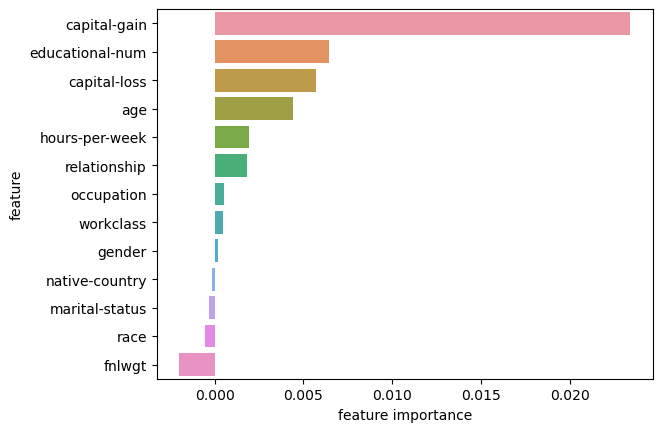

In [56]:
drop_column_importance_plot(dt_optimized,X_train,Y_train)

In [60]:
impotance_features = drop_column_importance(dt_optimized,X_train,Y_train)
impotance_features

,feature,feature importance
0,capital-gain,0.023395
1,educational-num,0.006446
2,capital-loss,0.005696
3,age,0.004418
4,hours-per-week,0.001945
5,relationship,0.001806
6,occupation,0.000500
7,workclass,0.000472
8,gender,0.000195
9,native-country,-0.000167


In [79]:
Selected_features = impotance_features[impotance_features["feature importance"]>=0.0001]["feature"]
X_train =  X_train[Selected_features]
X_test = X_test[Selected_features]

In [80]:
dt_optimized.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=9, min_samples_split=9)

In [97]:
def Model_evaluation(model , X_train , X_test ,Y_tarin ,Y_test) :
    print("Train Classification Report : ")
    Y_predicted = model.predict(X_train)
    print(classification_report(Y_predicted,Y_train))
    sns.heatmap(confusion_matrix(Y_predicted,Y_train),annot=True)
    plt.show()
    print(40*"---")
    print("Test Classification Report : ")
    Y_predicted = model.predict(X_test)
    print(classification_report(Y_predicted,Y_test))
    sns.heatmap(confusion_matrix(Y_predicted,Y_test),annot=True)
    
    

Train Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     29509
           1       0.62      0.78      0.69      6482

    accuracy                           0.88     35991
   macro avg       0.79      0.84      0.81     35991
weighted avg       0.89      0.88      0.88     35991



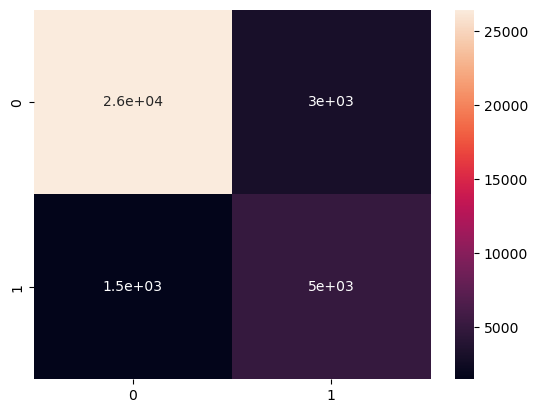

------------------------------------------------------------------------------------------------------------------------
Test Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7328
           1       0.61      0.75      0.67      1670

    accuracy                           0.86      8998
   macro avg       0.77      0.82      0.79      8998
weighted avg       0.88      0.86      0.87      8998



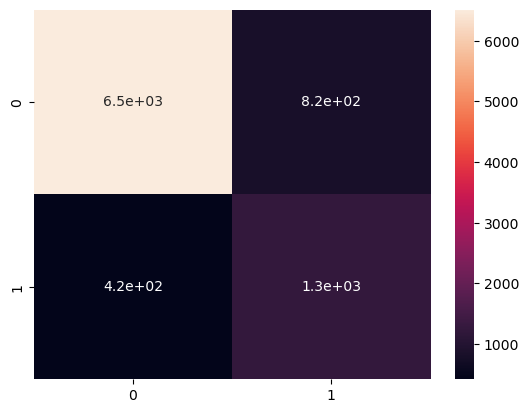

In [98]:
Model_evaluation(dt_optimized,X_train,X_test,Y_train,Y_test)